# 66. 

# 67. Maximum path sum II
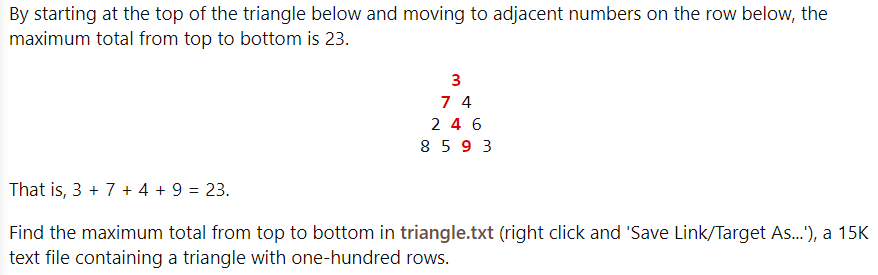

In [15]:
#Vamos a ir de abajo hacia arriba y vamos reduciendo cada triangulito de 3 elementos en la zona inferior

import numpy as np
from collections import deque
import math
import time

ini = time.time()


#En este archivo leemos la piramide y le damos la estructura de grafo 
# con los pesos dados por el problema.
#Leemos el archivo
f = open("problema67.txt", "r")
array = []
line = f.readline()
index = 0
while line:
    line = line.strip("\n")
    line = line.split()
    line= [int(x) for x in line]
    array.append(line)
    line = f.readline()
f.close()





# l es la cantidad de filas
l =len(array)
#n es la cantidad de eleemntos.
n = int(l*(l+1)/2)



#vamos de las filas desde abajo hacia arriba
for j in range(l,1,-1):
    #sacamos la ultima linea del array
    linea= array.pop()
    # para cada elemento de la penultima linea
    for k in range(0,j-1):
        #vemos cual es el maximo de los dos elementos abajo
        maxim = max(linea[k], linea[k+1])
        #le sumamos el maximo 
        array[-1][k] = array[-1][k] + maxim

print(array[0][0])
print(time.time()-ini)

7273
0.008495807647705078


In [14]:
''' Algoritmo con Djikstra, mucho mas lento'''


import numpy as np
from collections import deque
import math
import time

ini = time.time()


#En este archivo leemos la piramide y le damos la estructura de grafo 
# con los pesos dados por el problema.
#Leemos el archivo
f = open("problema67.txt", "r")
array = []
line = f.readline()
index = 0
while line:
    line = line.strip("\n")
    line = line.split()
    for item in line:
        array.append(100-int(item))
    line = f.readline()
    index += 1
f.close()



#array tiene todos los costos de las conexiones. 
#n es la cantidad de nodos
n = len(array)

# l es la cantidad de filas
l = int((-1+np.sqrt(1+8*n))/2)

''' Usamos una libreria que tiene el dijstra implementado'''
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra
import numpy


#creamos un grafo con la cantidad de nodos
#en la posicion (i,j) hay que poner el peso de ir de i a j. 
graph = np.zeros((n,n))

def hijo(n):
    #dado que un nodo est'a en posici'on n en el arbol, cual es la posicion de su hijo izquierd
    
    #la fila de n se consigue como:
    fila = int(math.floor(-1/2+(1+8*n)**(1/2)/2))
    #la columna est'a dada por
    col = n - ((fila-1)**2+fila-1)/2
    #la columna del hijo es la misma, pero la fila es una mas
    
    hijo = (fila**2+fila)/2 + col+1
    return(int(hijo))
   
    
#vamos agregando las conexiones, que hay tantas como n(n-1)
for i in range(n-l):
    graph[i,hijo(i)] = array[i]
    graph[i,hijo(i)+1] = array[i]
graph = csr_matrix(graph)

dist_matrix, predecessors = dijkstra(csgraph=graph, indices=0, return_predecessors=True)

ult = dist_matrix[n-l:n]

for i in range(len(ult)):
    ult[i] = ult[i]+array[n-l+i]

print(l*100-min(ult))

print(time.time()-ini)

7273.0
0.5188641548156738
